## Loading libraries anad dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 111)

In [2]:
# Loading the csv file
df=pd.read_csv('loan.csv')

## General synopsis of dataset 

In [3]:
# .Checking initial rows of the dataset

df.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [5]:
# initial Shape of the dataset
print(f"no of rows       : {df.shape[0]}\nno of columns are: {df.shape[1]}")


no of rows       : 39717
no of columns are: 111


## Handling columns with null and single values 

In [6]:
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### .....................................................................................................

In [7]:
# checking for Columns where all the entries are null

columns_with_unique_nan = df.columns[df.isna().all()]
columns_with_unique_nan

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [8]:
# Counting the Number of columns with all the null values

num_columns = columns_with_unique_nan.shape
num_columns

(54,)

In [9]:
# Deleting those columns

df=df.drop(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim',
       'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit'],axis=1)

### .....................................................................

In [10]:
# Checking columns with single value

columns_with_one_value = df.columns[df.nunique() == 1]
columns_with_one_value

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],
      dtype='object')

In [11]:
# Dropping those columns

df=df.drop(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens'],axis=1)

### .....................................................................................................

In [12]:
# checking columns where >= 50% data is missing
missing_percentage=(df.isnull().sum()/df.shape[0]*100)
missing_percentage[missing_percentage > 50].index

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [13]:
# Dropping such columns
df=df.drop(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'],axis=1)

## Removing Variables that are weak or no indicator of defaulter





###### There are few columns that holds very less or no relevence in studying loan status,feature such as text description,unique identifiers,URL's,etc:
        1.id
        2.member_id
        3.url 
        4.title  
        5.zip_code 
        6.last_credit_pull_d 
        7.addr_state
        8.desc
        
   
###### Since these columns contain information about payments and recoveries that occur after charge-off, they are not suitable for predicting whether a loan will default at the time of application
       1.recoveries
       2.collection_recovery_fee
       3.total_pymnt
       4.total_pymnt_inv
       5.total_rec_int
       6.total_rec_late_fee
       7.total_rec_prncp
       8.last_pymnt_amnt
        
##### Columns providing Date Information post loan approval might not be directly relevant to predicting default:
      1.last_credit_pull_d  

##### Some other columns which can be dropped are:

    
     1.earliest_cr_line( earliest reported credit info is not a strong factor)
     2.inq_last_6mths( 6 months is a short span for info,this might be less influential depending on the overall credit history)
     3.open_acc(open_acc is likely to be included in total_acc)
     4.revol_util(revol_bal would compliment)
     5.out_prncp( ongoing payment information might be less relevant)
     6.out_prncp_inv( ongoing payment information might be less relevant)
     7.last_pymnt_d( might not be as relevant)
     8.pub_rec_bankruptcies(pub_rec might provide a more comprehensive view including history of bamckrupcy)

 



In [14]:
# Above mentioned columns are to be dropped
df=df.drop([
    'id', 'member_id', 'desc', 'url', 'title', 'zip_code', 'addr_state',
     'last_credit_pull_d', 
    'recoveries', 'collection_recovery_fee', 'total_pymnt', 'total_pymnt_inv',
    'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'last_pymnt_amnt','earliest_cr_line','inq_last_6mths','open_acc','revol_util','out_prncp','out_prncp_inv','last_pymnt_d','pub_rec_bankruptcies'],axis=1)

# ['policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verified_status_joint' are anyways removed earlier]

In [15]:
#counting the final no of columns left  
print(f'final number of columns are: {df.shape[1]}')

final number of columns are: 21


## Re-evaluating new data

In [16]:
# Rechecking new data for datatypes and null values
print(df.info())
print(df.isnull().sum())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   installment          39717 non-null  float64
 6   grade                39717 non-null  object 
 7   sub_grade            39717 non-null  object 
 8   emp_title            37258 non-null  object 
 9   emp_length           38642 non-null  object 
 10  home_ownership       39717 non-null  object 
 11  annual_inc           39717 non-null  float64
 12  verification_status  39717 non-null  object 
 13  issue_d              39717 non-null  object 
 14  loan_status          39717 non-null  object 
 15  purpose              39717 non-null 

In [17]:
# analysing Two variables (emp_title,emp_length )for null valus %
((df[['emp_title','emp_length']]).isnull().sum()/len(df.index))*100


emp_title     6.191303
emp_length    2.706650
dtype: float64

In [18]:
# checking unique values for emp_length
print(f"data before changing format:{df['emp_length'].unique()}")


# Changing the format of data
df['emp_length']=df['emp_length'].str.extract(r'(\d+)')
df['emp_length']=pd.to_numeric(df['emp_length'])
print(f"data after changing format:{df['emp_length'].unique()}")

data before changing format:['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]
data after changing format:[10.  1.  3.  8.  9.  4.  5.  6.  2.  7. nan]


In [19]:
# Changing the format of issue_d into month and year

from datetime import datetime
df['issue_d']=df['issue_d'].apply(lambda x:pd.to_datetime(x,format='%b-%y'))
df['loan_fund_month']=df['issue_d'].apply(lambda x: x.month)
df['loan_fund_year']=df['issue_d'].apply(lambda x: x.year)


In [20]:
# checking for values in loan_status(loan_status is also the target variable)
df['loan_status'].value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [21]:
# Filtering only fully paid or charged-off
df = df[df['loan_status'].isin(['Fully Paid', 'Charged Off'])]

# Mapping 'Fully Paid' to 0 and 'Charged Off' to 1
df['loan_status'] = df['loan_status'].map({'Fully Paid': 0, 'Charged Off': 1}).astype(int)

df['loan_status'].value_counts()

loan_status
0    32950
1     5627
Name: count, dtype: int64

In [22]:
# Changing the format(removing % )
df['int_rate'] = df['int_rate'].apply(lambda x:float(x.strip('%')))

## Seperating categorical and integer columns for convenient EDA 

In [23]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"numerical columns:{numeric_columns}\ncategorical columns:{categorical_columns}")

numerical columns:Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'loan_status', 'dti',
       'delinq_2yrs', 'pub_rec', 'revol_bal', 'total_acc', 'loan_fund_month',
       'loan_fund_year'],
      dtype='object')
categorical columns:Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose'],
      dtype='object')


## Univariate Analysis

### 1. Data distribution

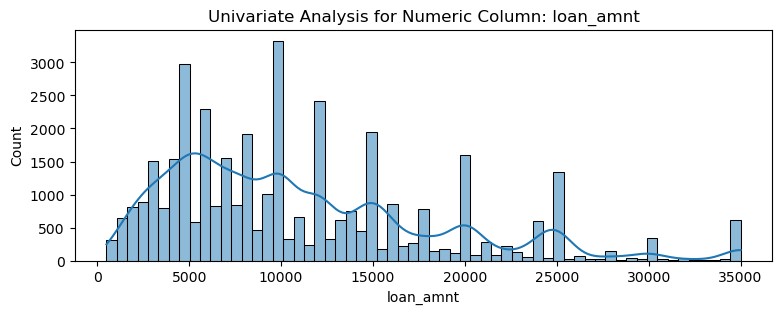

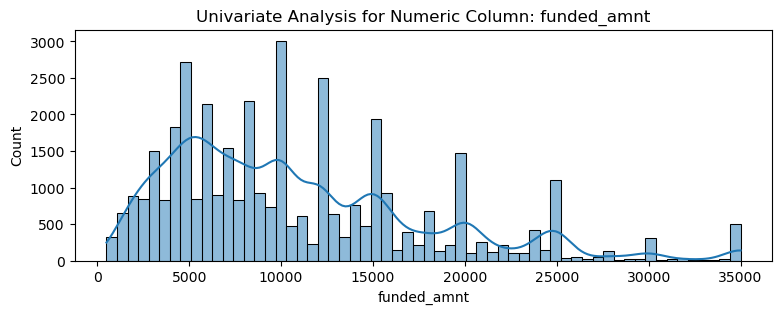

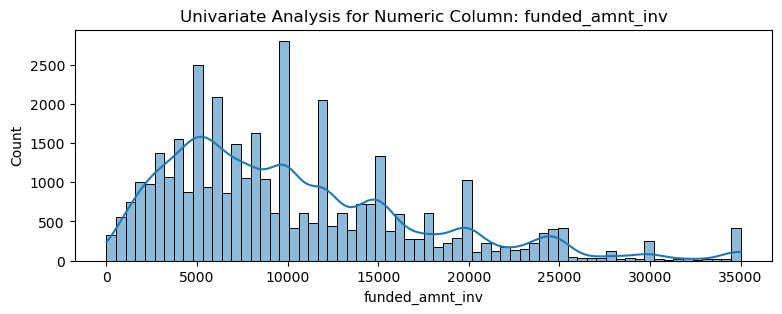

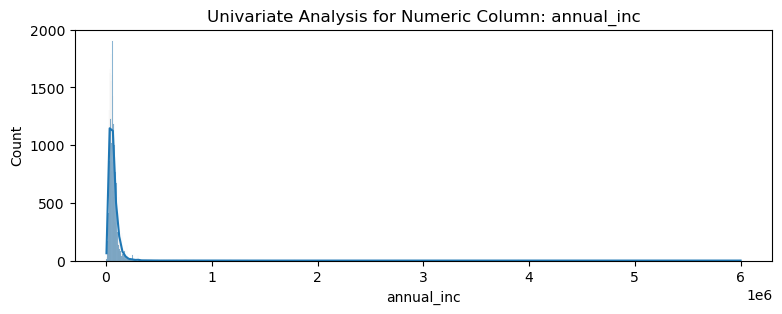

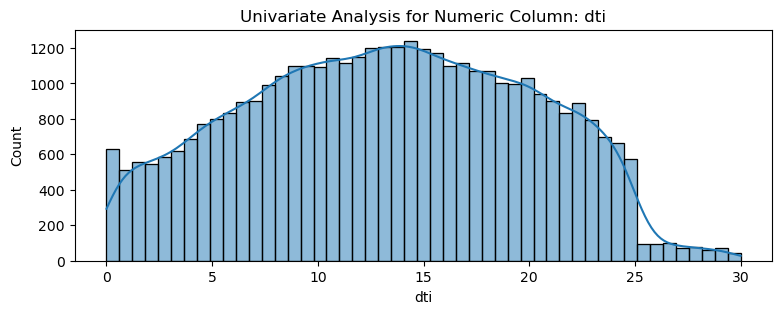

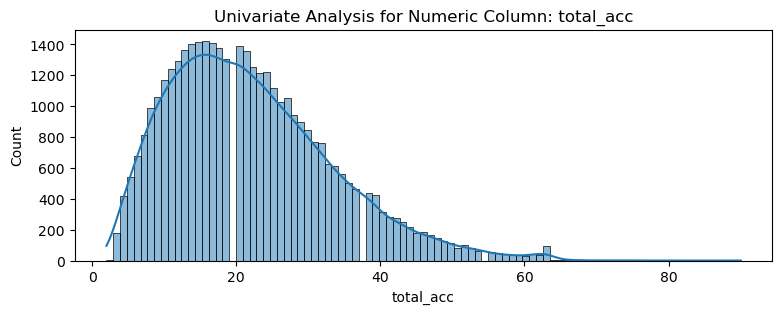

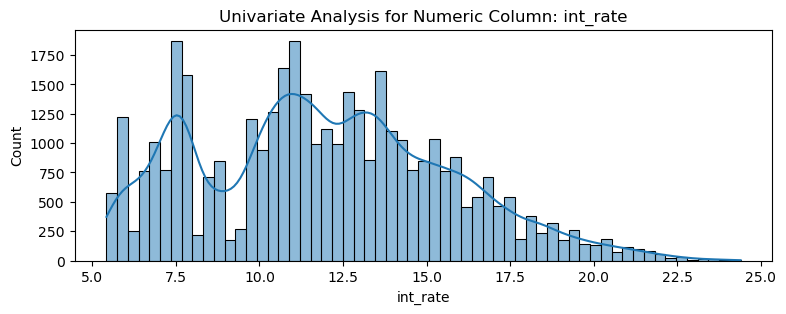

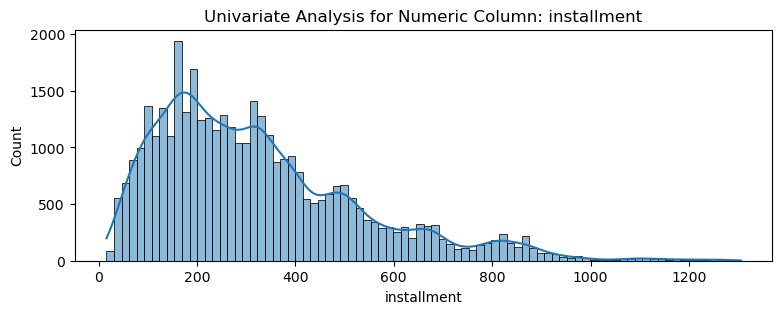

In [24]:
# Univariate Analysis for Numeric Columns
dist=['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'annual_inc', 'dti','total_acc','int_rate','installment' ]
for col in dist:
    plt.figure(figsize=(9, 3))
    sns.histplot(df[col].dropna(),kde=True)
    plt.title(f'Univariate Analysis for Numeric Column: {col}')
    plt.show()

In [25]:
#average of features
print(f"mean value of loan amount:{df['loan_amnt'].mean()}")
print(f"mean value of funded amount investment:{df['funded_amnt_inv'].mean()}")
print(f"mean value of annual income:{df['annual_inc'].mean()}")
print(f"mean value of total account:{df['total_acc'].mean()}")
print(f"mean value of total account:{df['int_rate'].mean()}")
print(f"mean value of installment:{df['installment'].mean()}")


mean value of loan amount:11047.02542966016
mean value of funded amount investment:10222.481123435346
mean value of annual income:68777.97368120901
mean value of total account:22.052647950851544
mean value of total account:11.93221867952407
mean value of installment:322.466318013324


#### Inferences :
    1.The distribution plot of loan amount vs. count reveals a right-skewed distribution, indicating a concentration of         loans towards lower amounts. The mean loan amount is 11047, with a notable peak in the range of 0 to 35000.There           are no case of outliers as such.
    2.funded amount and funded amount invested also follows approximately the same trend
    3.The average annual income value is 68777.
    4.The total number of credit lines currently in the borrower's credit file is 22,it ranges from 0 to 60.
    5. the intrest rate varies from approximately 6 tp 23 percent,with an average of 12 percent.
    6.The average value of installment is 322.It has a wide range that goes beyond 1200

### 2.count plots

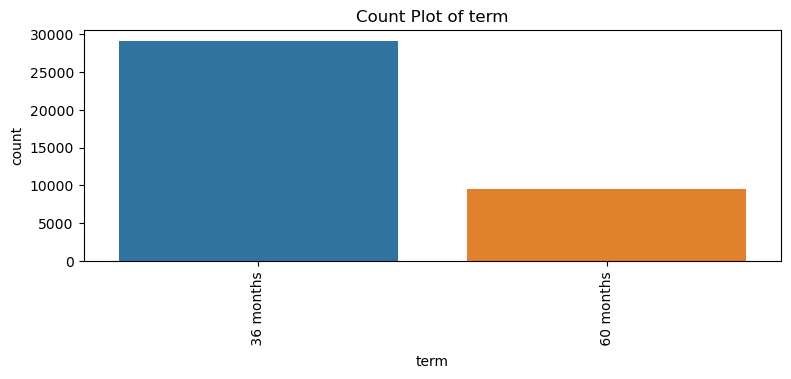

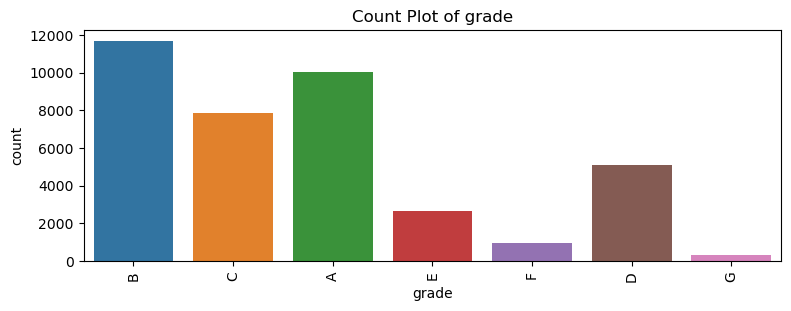

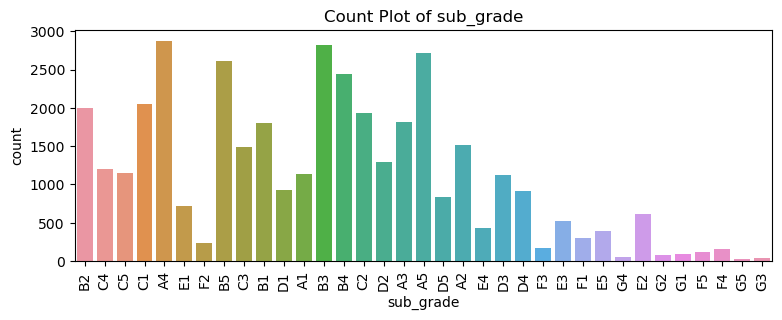

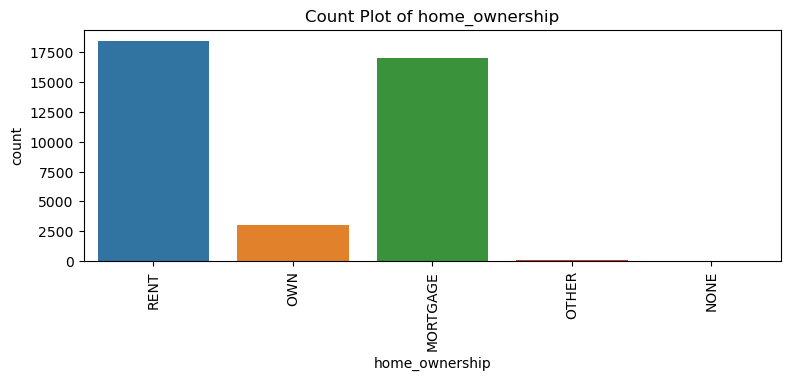

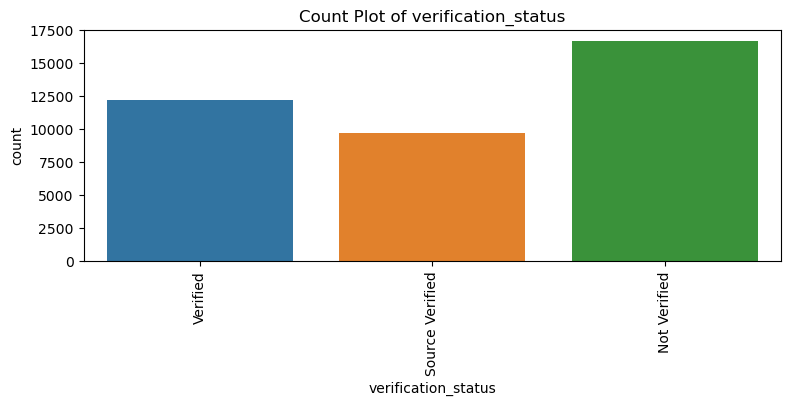

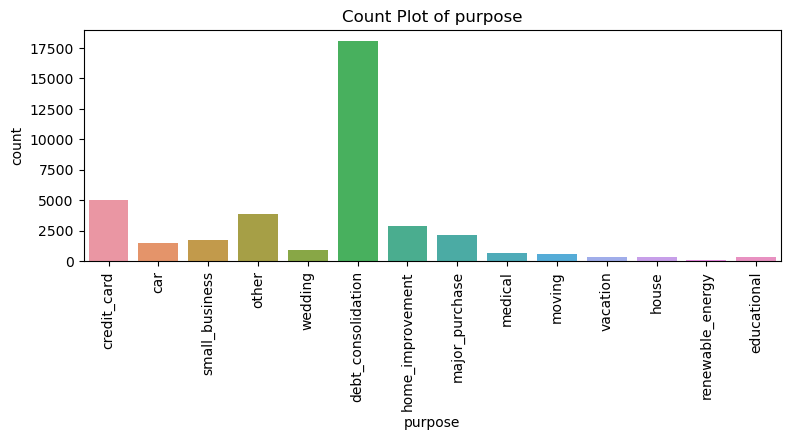

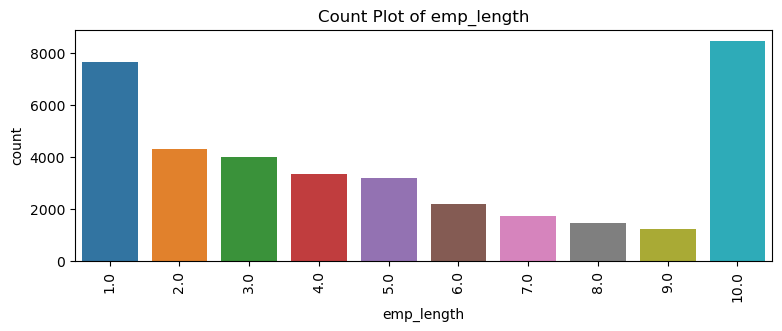

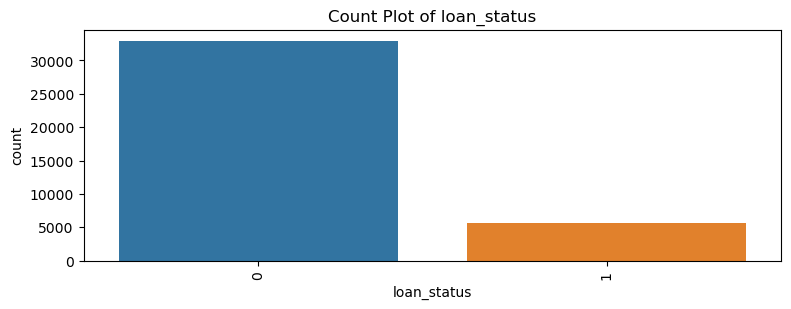

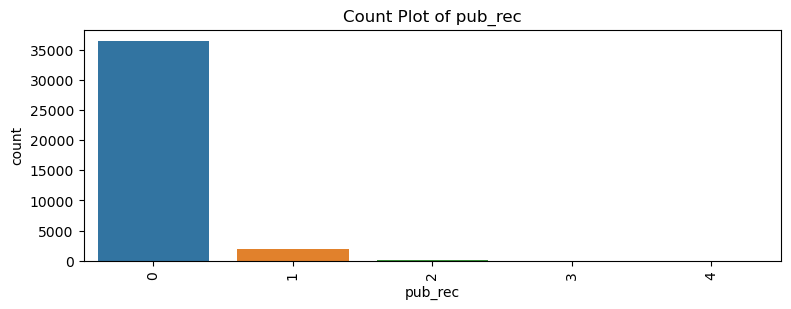

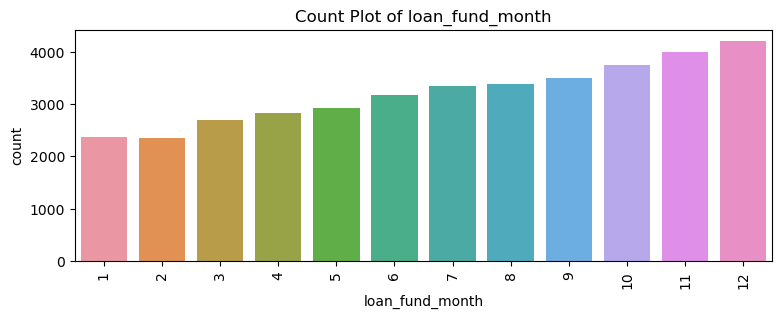

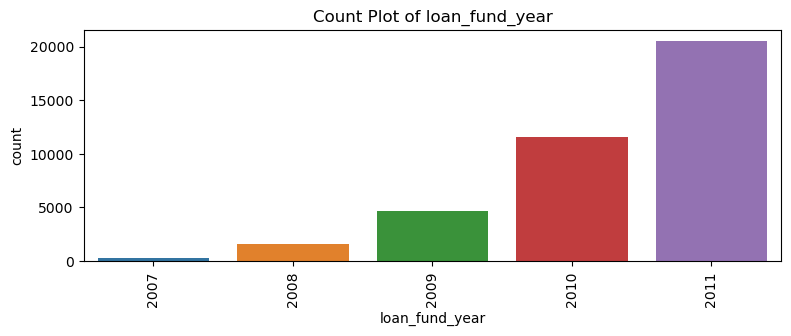

In [26]:
count=['term', 'grade', 'sub_grade', 'home_ownership',
       'verification_status', 'purpose','emp_length', 'loan_status', 
       'pub_rec', 'loan_fund_month',
       'loan_fund_year']
for column in count:
    plt.figure(figsize=(9, 3))
    sns.countplot(x=column, data=df)
    plt.title(f'Count Plot of {column}')
    plt.xticks(rotation=90)
    plt.show()
    

In [27]:
# value count of features
print(f"value count of term:{df['term'].value_counts()}")
print(f"value count of grade:{df['grade'].value_counts()}")
print(f"value count of sub_grade:{df['sub_grade'].value_counts()}")
print(f"value count of home ownership:{df['home_ownership'].value_counts()}")
print(f"value count of verification status:{df['verification_status'].value_counts()}")
print(f"value count of purpose of loan:{df['purpose'].value_counts()}")
print(f"value count of employment duration:{df['emp_length'].value_counts()}")
print(f"value count of public record:{df['pub_rec'].value_counts()}")
print(f"value count of month of funding loan:{df['loan_fund_month'].value_counts()}")
print(f"value count of year of funding loan:{df['loan_fund_year'].value_counts()}")



value count of term:term
 36 months    29096
 60 months     9481
Name: count, dtype: int64
value count of grade:grade
B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: count, dtype: int64
value count of sub_grade:sub_grade
A4    2873
B3    2825
A5    2715
B5    2615
B4    2437
C1    2055
B2    2001
C2    1931
A3    1810
B1    1797
A2    1508
C3    1488
D2    1286
C4    1206
C5    1154
A1    1139
D3    1116
D1     931
D4     918
D5     834
E1     722
E2     614
E3     516
E4     424
E5     387
F1     305
F2     233
F3     174
F4     151
F5     113
G1      94
G2      77
G4      54
G3      45
G5      29
Name: count, dtype: int64
value count of home ownership:home_ownership
RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: count, dtype: int64
value count of verification status:verification_status
Not Verified       16694
Verified           12206
Source Verified     9677
Name: count, dtype: int64
value count of p

#### Inferences:
     1.The term for around 75% of the loan is 36 months.
     2.most assigned grade by LC is B and A and the least is G.
     3.most assigned subgrade by LC is A4,B3,A5,B5,B4 and least are from the category of G.
     4.Home ownership status of borrowers are:48% own rented house and 44% have mortgage.owner of the home is less than          1%.
     5.Most of the income source is not verified by LC.
     6.over 45% of the loan alone is takenfor the purpose of debt consolidation.
     7.Most of the employeeswho have taken loan has been employeed for over 10 years. the next intresting pattern to be          observed is employees with 1 or less than 1 year employment are the next big chunk of borrowers.
     8.95% people have 0 derogatory public records.
     9.month of loan funding is not a significant factor,still we can notice number of issued loan ascend with month.
     10.number of issued loan has incereased over the years ranging from 2007 to 2011.
   

## Bivariate analysis

### 1. countplot w.r.t loan status

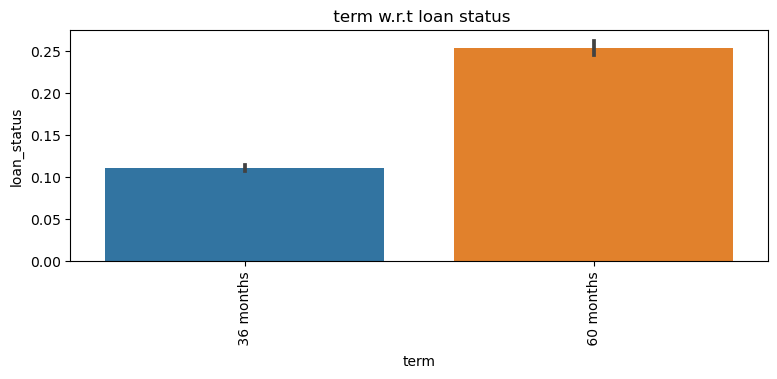

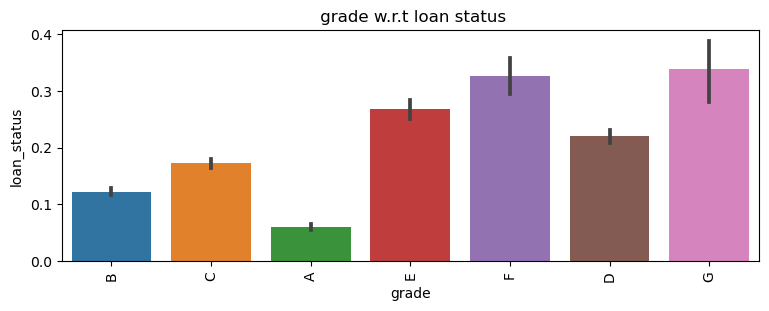

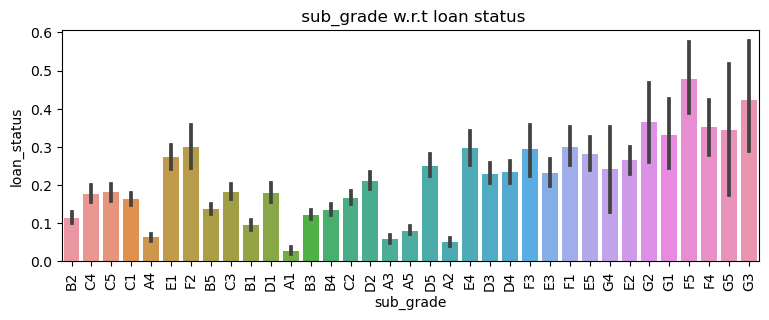

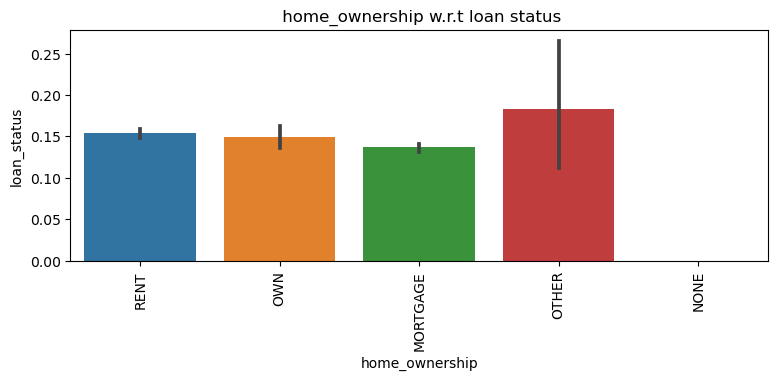

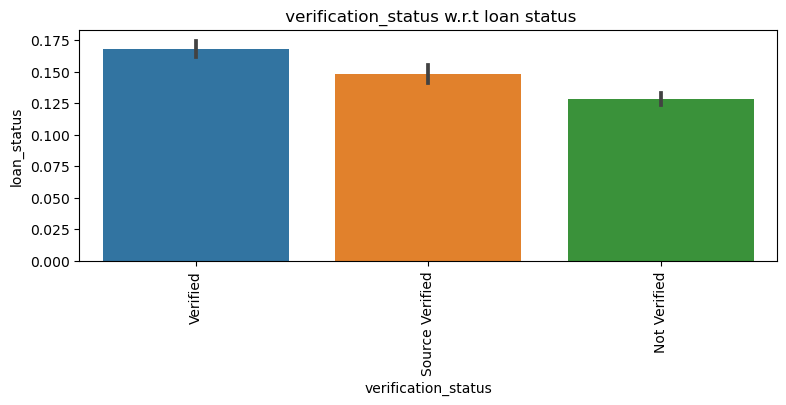

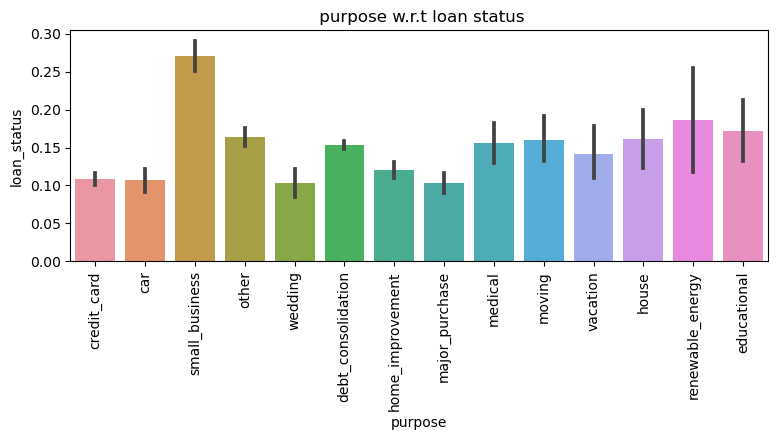

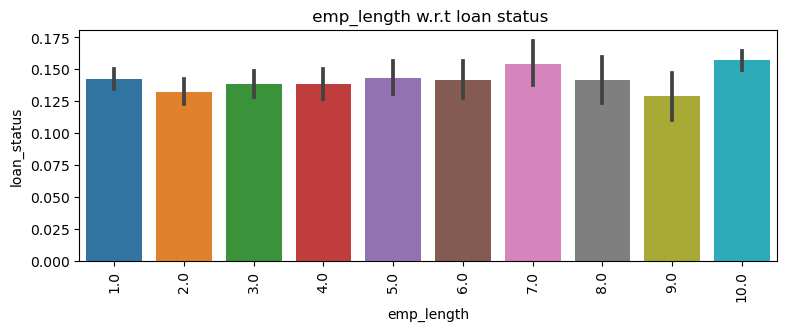

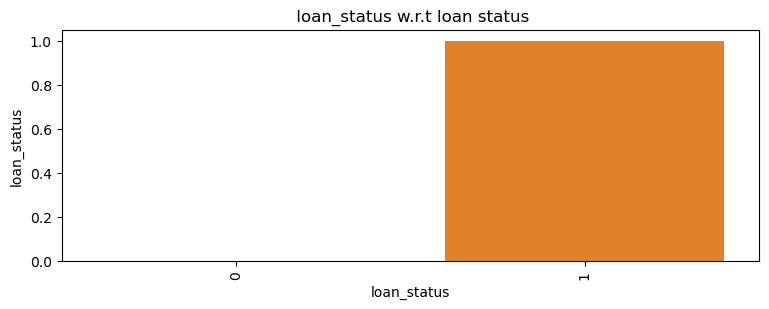

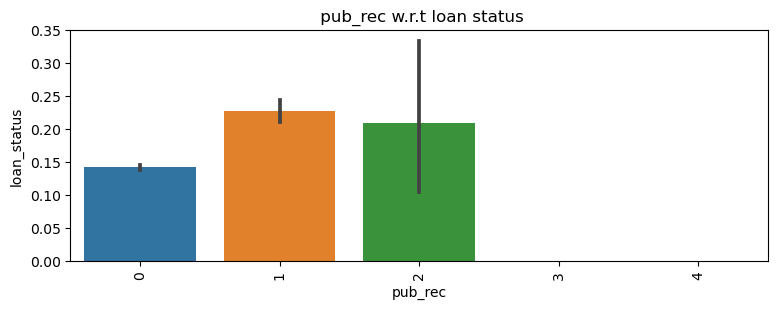

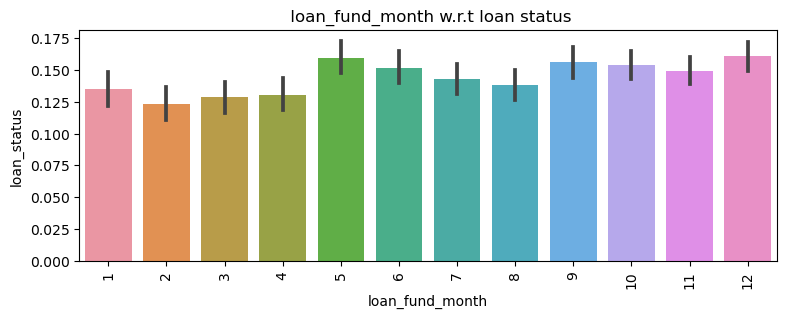

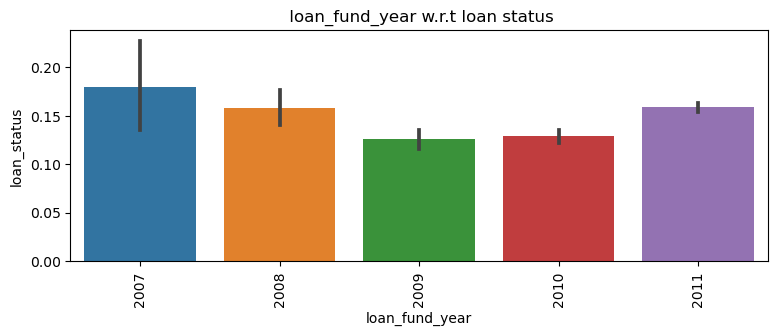

In [28]:
for column in count:
    plt.figure(figsize=(9, 3))
    sns.barplot(x=column, y='loan_status', data=df)
    plt.title(f' {column} w.r.t loan status')
    plt.xticks(rotation=90)
    plt.show()


   

### Inferences:
    1.Loan Term:
    Non-defaulters (loan_status=0) have more loans with a term of 36 months compared to defaulters.
    Defaulters have a higher proportion of loans with a term of 60 months.

    2.Grade:
    Non-defaulters tend to have higher grades (A, B) compared to defaulters.
    Defaulters have a higher proportion of lower grades (C, D, E, F, G).

    3.Sub-Grade:
    Similar to grades, non-defaulters tend to have higher sub-grades.
    Defaulters have a higher proportion of lower sub-grades.

    4.Home Ownership:
    Non-defaulters are more likely to own homes (MORTGAGE, OWN) compared to defaulters.
    Defaulters are more likely to rent.

    5.Verification Status:
    Non-defaulters have a higher proportion of verified and source-verified loans compared to defaulters.
    Defaulters have a higher proportion of not verified loans.

    6.Purpose of Loan:
    Debt consolidation is common for both groups, but non-defaulters have a higher proportion.
    Defaulters have a higher proportion in other categories like small business, moving, and house.

    7.Employment Duration:
    Non-defaulters tend to have longer employment durations (especially 10 years) compared to defaulters.
    Defaulters have a higher proportion in shorter employment durations.

    8.Public Record:
    Non-defaulters have fewer derogatory public records compared to defaulters.
    


### 2. numeric vs categorical

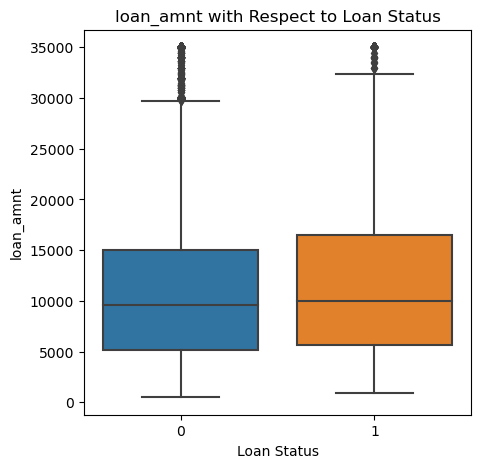

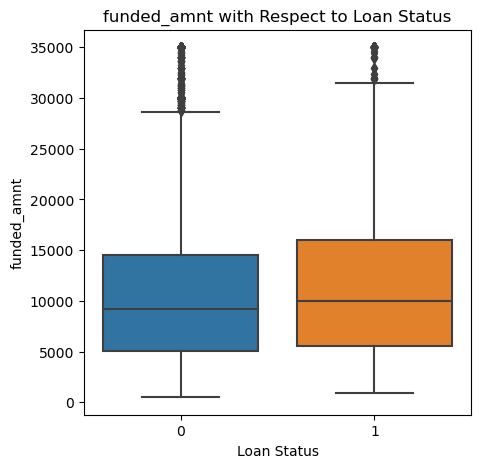

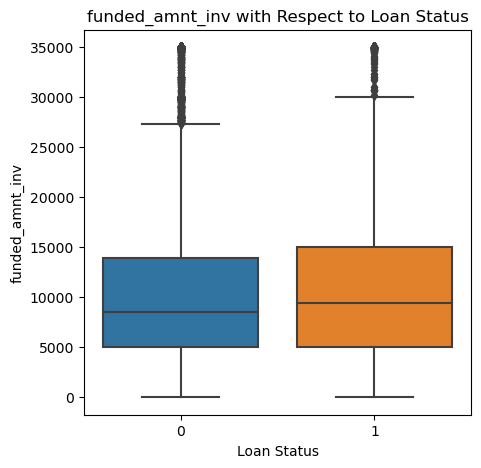

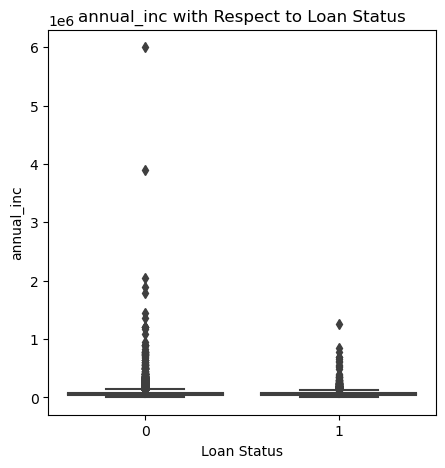

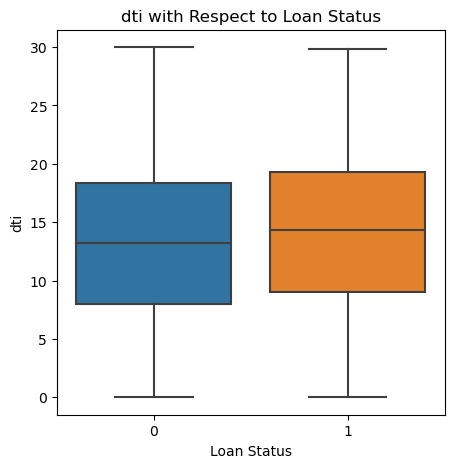

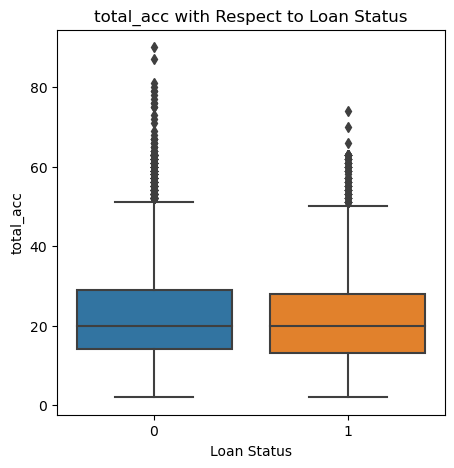

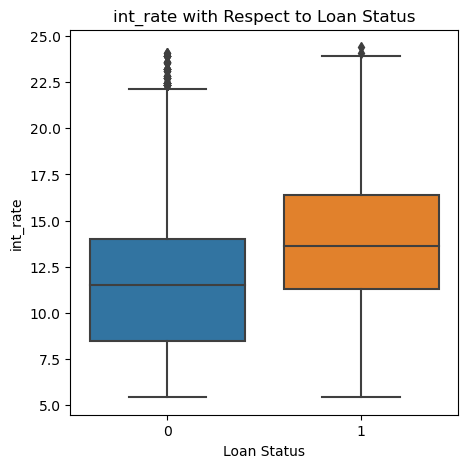

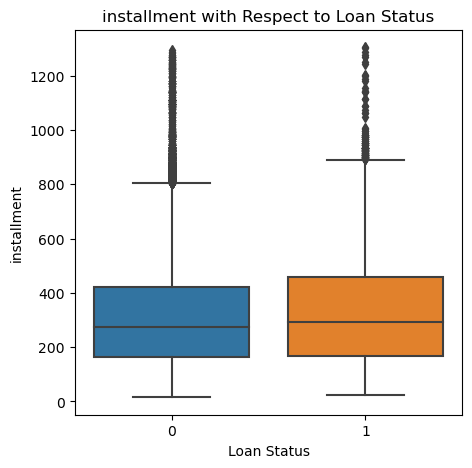

In [29]:

for column in dist:
    plt.figure(figsize=(5, 5))
    sns.boxplot(x='loan_status', y=column, data=df)
    plt.title(f'{column} with Respect to Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel(column)
    plt.show()

### Inferences:
       1.loan status vs intrest rate shows that there are more defaulters where average intrest rate is higher.
       2.rest of all the categories doesnot give significant patterns to analyse and differentiate defaulters from the                rest.


### 3.Categorical vs Categorical

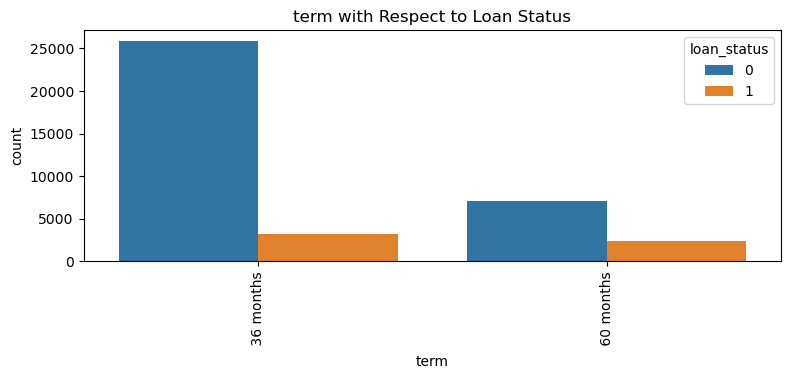

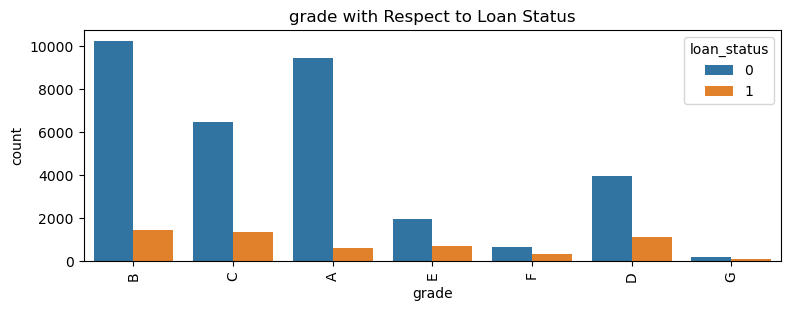

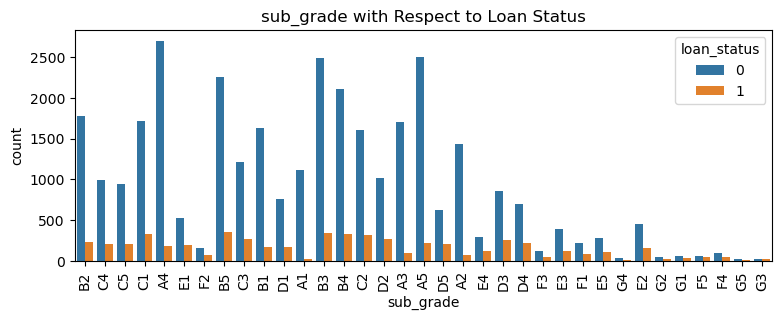

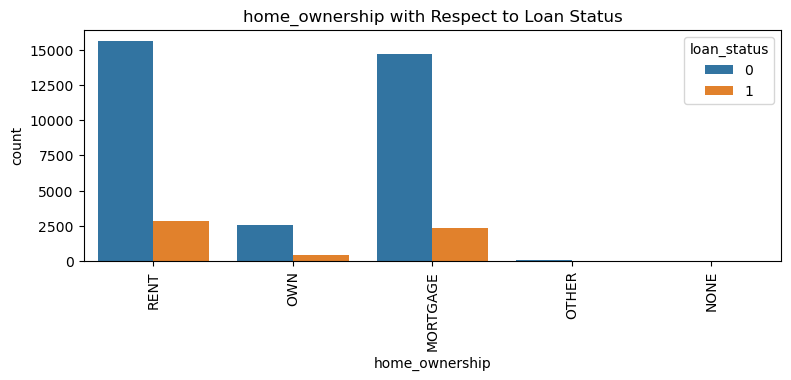

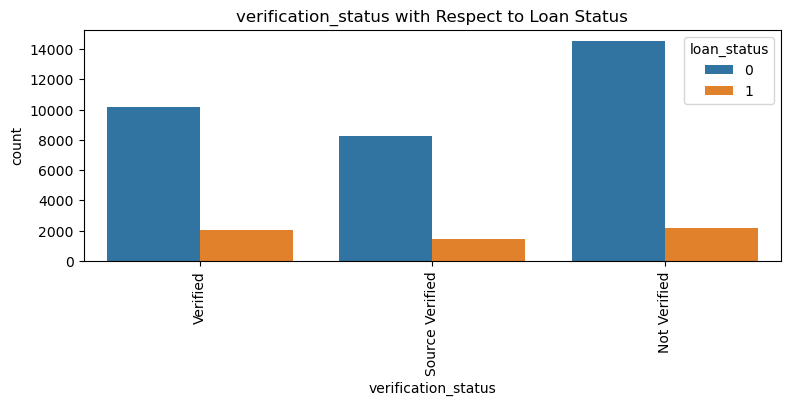

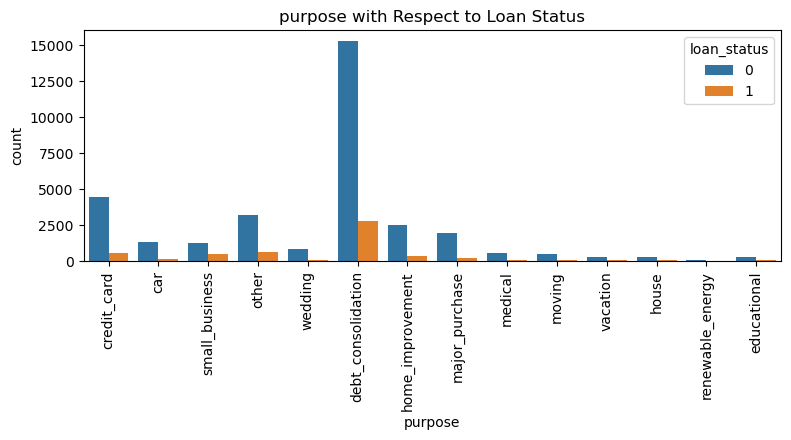

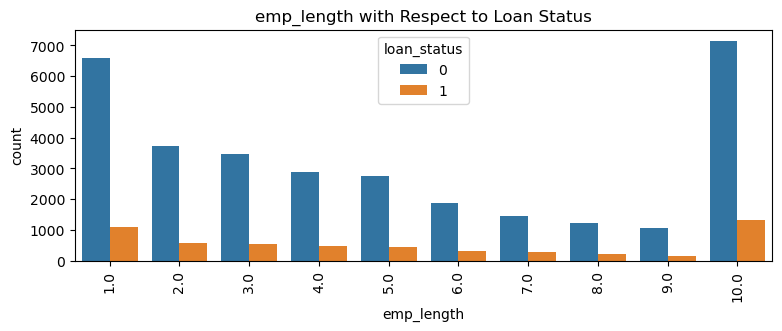

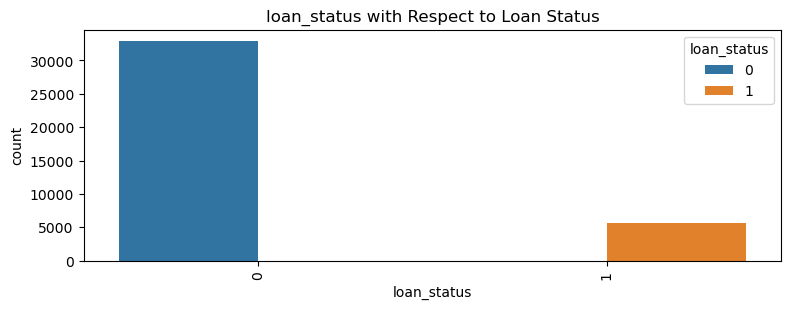

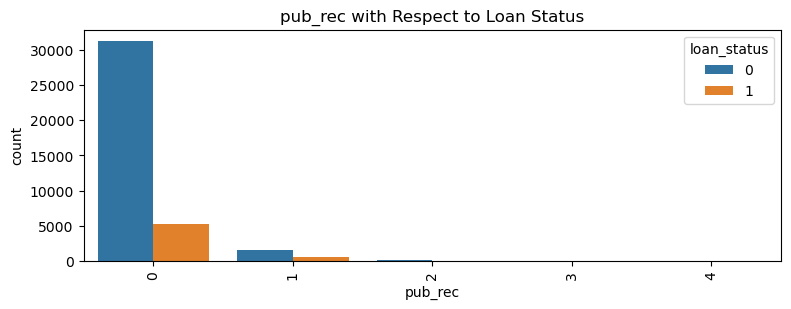

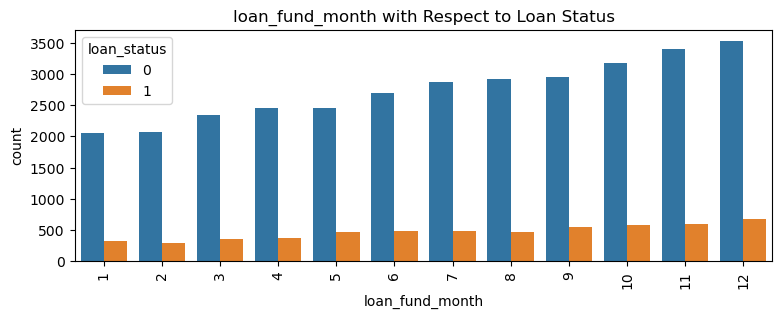

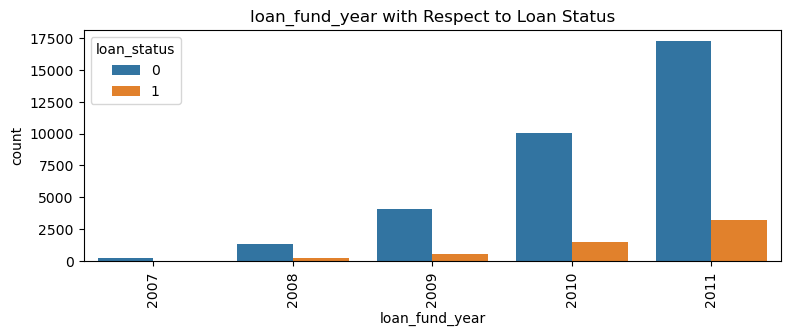

In [30]:

for column in count:
    plt.figure(figsize=(9, 3))
    sns.countplot(x=column, hue='loan_status', data=df)
    plt.title(f'{column} with Respect to Loan Status')
    plt.xlabel(column)
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.show()

In [31]:
for column in count:
    value_counts = df.groupby([column, 'loan_status']).size().unstack(fill_value=0)
    print(value_counts)

loan_status      0     1
term                    
 36 months   25869  3227
 60 months    7081  2400
loan_status      0     1
grade                   
A             9443   602
B            10250  1425
C             6487  1347
D             3967  1118
E             1948   715
F              657   319
G              198   101
loan_status     0    1
sub_grade             
A1           1109   30
A2           1434   74
A3           1707  103
A4           2695  178
A5           2498  217
B1           1626  171
B2           1773  228
B3           2484  341
B4           2108  329
B5           2259  356
C1           1719  336
C2           1610  321
C3           1218  270
C4            994  212
C5            946  208
D1            764  167
D2           1015  271
D3            860  256
D4            703  215
D5            625  209
E1            524  198
E2            451  163
E3            397  119
E4            298  126
E5            278  109
F1            214   91
F2            163   70
F3      

#### Inference:

**1.Term:**.  
    For '36 months' term, there are 25,869 loans with 'loan_status' 0 (fully paid) and 3,227 with 'loan_status' 1 (default).
    For '60 months' term, there are 7,081 loans with 'loan_status' 0 and 2,400 with 'loan_status' 1.


**2.Grade:**  
    Grade 'A' has 9,443 loans with 'loan_status' 0 and 602 with 'loan_status' 1.  
    Grade 'B' has 10,250 loans with 'loan_status' 0 and 1,425 with 'loan_status' 1.
    

**3.Home Ownership:**  
    For those with 'MORTGAGE' home ownership, there are 14,694 loans with 'loan_status' 0 and 2,327 with 'loan_status' 1.
    For those who 'OWN' their homes, there are 2,532 loans with 'loan_status' 0 and 443 with 'loan_status' 1.

**4.Verification Status:**
    For 'Not Verified' verification status, there are 14,552 loans with 'loan_status' 0 and 2,142 with 'loan_status' 1.
    For 'Source Verified' verification status, there are 8,243 loans with 'loan_status' 0 and 1,434 with 'loan_status' 1.

**5.Purpose:**
    For the purpose of 'debt_consolidation', there are 15,288 loans with 'loan_status' 0 and 2,767 with 'loan_status' 1.
    For the purpose of 'credit_card', there are 4,485 loans with 'loan_status' 0 and 542 with 'loan_status' 1.

**6.Employment Length:**
    For those with an employment length of '1.0' year, there are 6,582 loans with 'loan_status' 0 and 1,095 with       'loan_status' 
    For those with an employment length of '2.0' years, there are 3,724 loans with 'loan_status' 0 and 567 with 'loan_status' 

**7.Public Records:**
    For those with '0' public records, there are 31,347 loans with 'loan_status' 0 and 5,160 with 'loan_status' 1.
    For those with '1' public record, there are 1,556 loans with 'loan_status' 0 and 457 with 'loan_status' 1.

**8.Loan Funding Month and Year:**
    For loans funded in January ('loan_fund_month' = 1), there are 2,058 loans with 'loan_status' 0 and 321 with 'loan_status' 
    For loans funded in 2007 ('loan_fund_year' = 2007), there are 206 loans with 'loan_status' 0 and 45 with 'loan_status' 

**9.Loan Status by Number of Public Records:**
    For those with '0' public records, there are 31,347 loans with 'loan_status' 0 and 5,160 with 'loan_status' 1.

### Heatmap

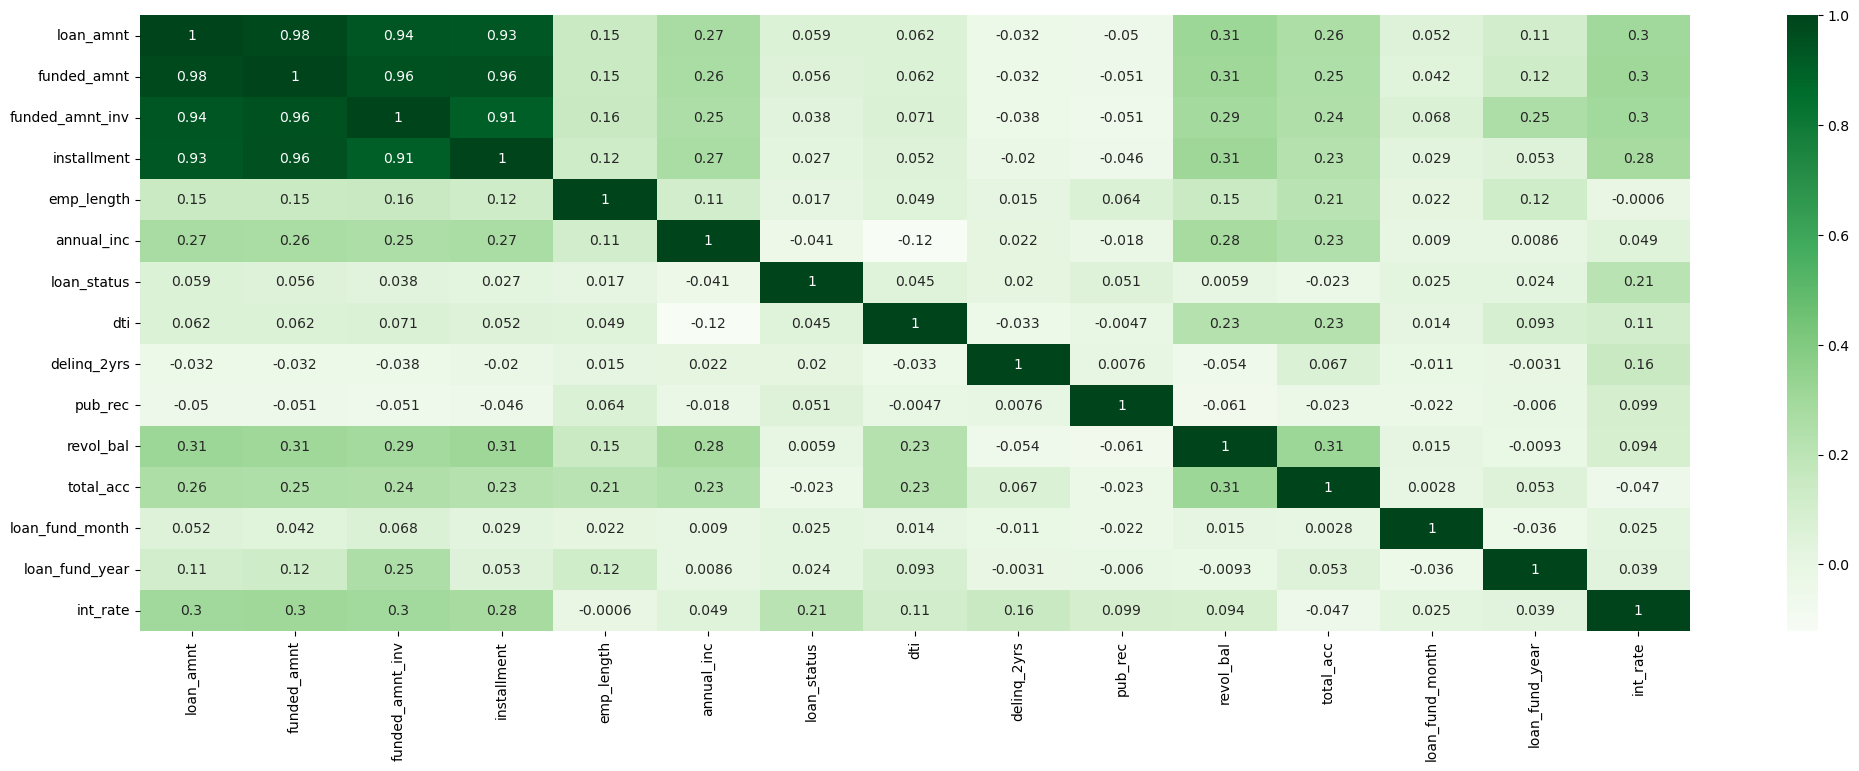

In [34]:
plt.figure(figsize=(25,8))
sns.heatmap(df[['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'emp_length', 'annual_inc', 'loan_status', 'dti', 'delinq_2yrs',
       'pub_rec', 'revol_bal', 'total_acc', 'loan_fund_month',
       'loan_fund_year', 'int_rate',
      ]].corr(),annot=True,cmap="Greens")
plt.show()

### Inference:

    1.The variable loan_status has positive correlations with annual_inc and loan_fund_year. This suggests that higher annual income and more recent loan funding years may be associated with a higher likelihood of the loan being in a certain status.
    
    2.There are negative correlations between loan_status and several variables, including dti, delinq_2yrs, pub_rec, loan_fund_month, and int_rate. This implies that higher debt-to-income ratio (dti), a greater number of delinquencies (delinq_2yrs),derogatory public records (pub_rec), older loan funding months (loan_fund_month), and higher interest rates (int_rate) are associated with a lower likelihood of the loan being in a positive status 
    
    3.loan_status shows weak correlations with other variables like loan_amnt, funded_amnt, funded_amnt_inv, and installment. This suggests that the initial loan amount and related financial metrics have a relatively weaker association with the loan status.

# Final Conclusion:


###  in order to reduce defaulter rate:


    1. Favor shorter loan terms (e.g., 36 months) to reduce the risk of default.

    2.Prefer applicants with higher grades (A, B) and sub-grades to minimize the risk associated with lower-grade loans.
    Home Ownership:

    3.Give preference to applicants who own homes (MORTGAGE, OWN) rather than those who rent.

    4.Prioritize applicants with verified and source-verified loans, as they are associated with a lower risk of default.

    5.Focus on applications for debt consolidation, which is associated with a lower risk. Be cautious with purposes like small business, moving, and house, which are associated with higher default rates.

    6.Give preference to applicants with longer employment durations, especially those with 10 years of employment.

    7.Be cautious when applicants have derogatory public records, as they are associated with a higher risk of default.
    

    8.Consider setting reasonable and competitive interest rates. Higher interest rates are associated with a higher likelihood of default, so carefully assess the interest rates assigned to applicants.

    9.Utilize a comprehensive approach that considers a combination of factors, including loan term, grade, home   ownership, verification status, loan purpose, employment duration, public records, and interest rates.
    
    10.Negative correlations with dti, delinq_2yrs, pub_rec, loan_fund_month, and int_rate suggest that higher debt, delinquencies, public records, older loan funding months, and higher interest rates are associated with a negative loan status.
